<a href="https://colab.research.google.com/github/ttknguyen/CS114.L22.KHCL/blob/master/CS114.L22.KHCL/tree/master/BaiTapColab/Bai4/CrawlData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"><b>CS114.L21 - MÁY HỌC - MACHINE LEARNING</b></h1>
<h1 align="center"><b>BÀI TẬP COLAB SỐ 04: Crawl Data</b></h1>

# Phân tích web

Sau khi tìm hiểu trên trang web https://babylonbee.com/ nhóm em phát hiện rằng để có thể kiếm thông tin các bài đã đăng thì thêm sau đường dẫn "news?page=" + trang. Ví dụ: https://babylonbee.com/news?page=1. 

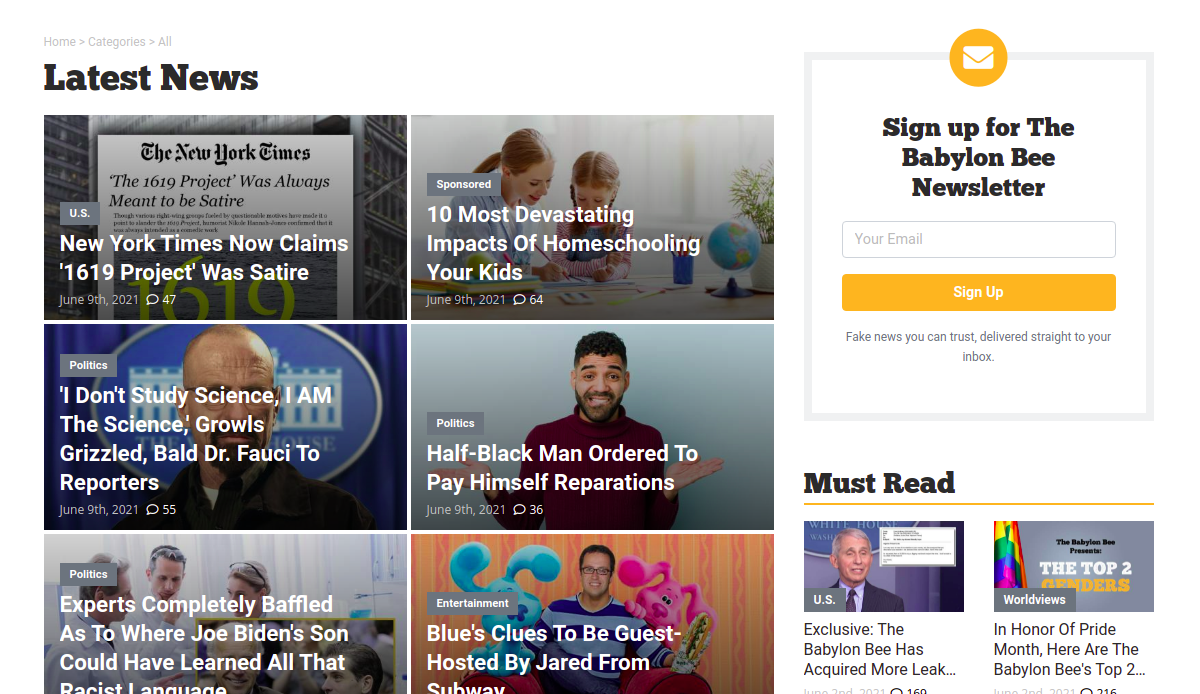

Điều chúng ta cần quan tâm ở đây là:
  - is_sarcastic
  - headline
  - article_link

- Về is_sarcastic do đây là trang báo đang các tin châm biếm nên label cho các bài báo crawl về sẽ là 1.
- Còn về headline và article_link thì sau khi kiểm tra thì nhóm em tìm thấy các bài báo được lưu ở class "col-sm-6", article_link ở thẻ "a href", tiêu đề của các bài báo thì ở class con "featured-article-meta-container" ở thẻ "h2 style"

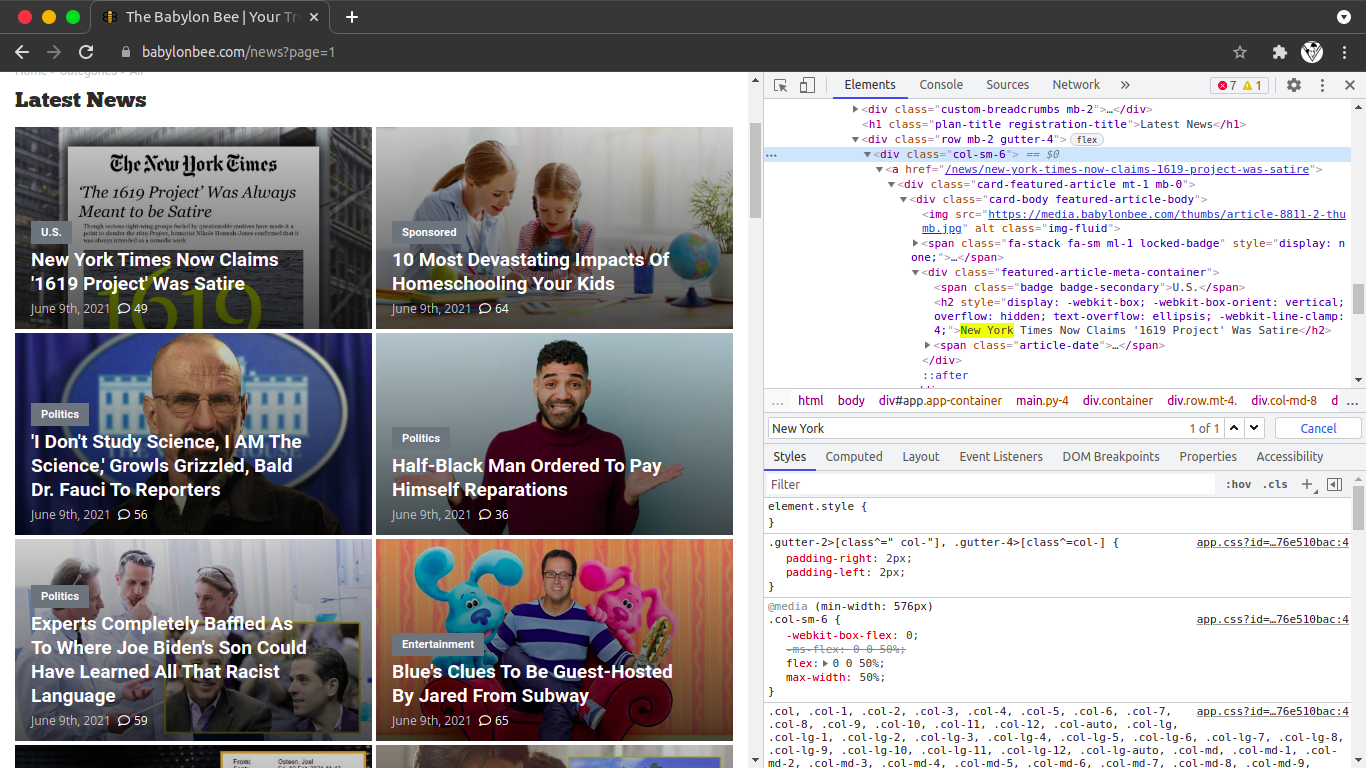

Ngoài ra, chúng ta cũng cần kiểm tra thời gian đăng của bài báo để có thể dừng việc crawl khi quá thời gian cho phép.

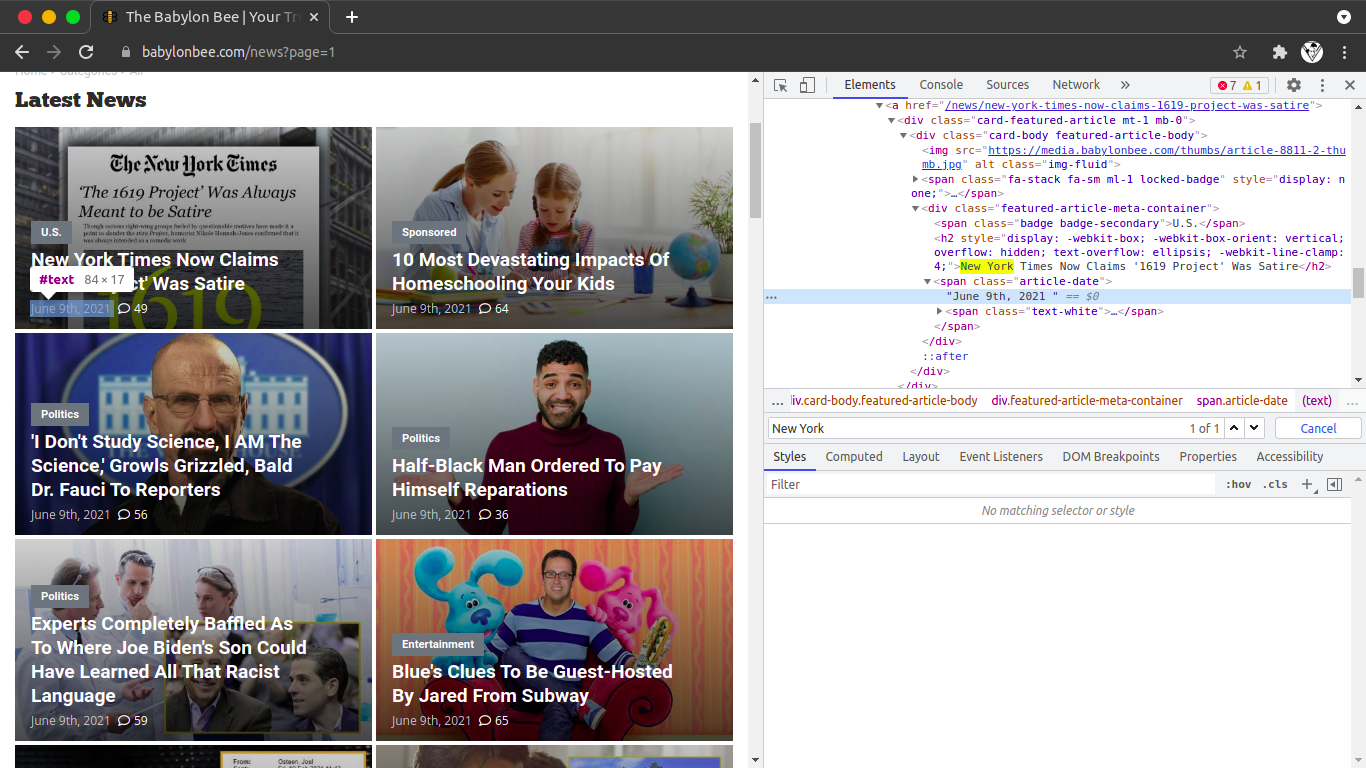

# Import Librabries

In [ ]:
import requests
from bs4 import BeautifulSoup as Soup
from tqdm.notebook import tqdm #Progress bar
import json

Hàm writeJson dùng để xuất ra file Json từ data crawl được

In [ ]:
def writeJson(data, fileName):
  with open(fileName+'.json', 'w') as f:
    for i in data:
      f.write('{"is_sarcastic": ' + str(i[2]) + ', "headline": "' + i[0] + '", "article_link": "' + i[1] +'"}\n')


#  Babylonbee

## Crawl Dữ Liệu

In [ ]:
# Dùng để gửi request đến trang web với tham số là số thứ tự trang cần thu thập
def sendRequest(page):
  #Tạo đường liên kết đến trang cần thu thập dữ liệu
  url = "https://babylonbee.com/news?page=" + str(page)
  #Gửi request đến trang đó
  request = requests.get(url)
  #BeautifulSoup dùng để phân tích dữ liệu html thành dữ liệu cây để chúng ta dễ dàng thao tác sau này
  soupSite = Soup(request.text, 'html.parser')
  return soupSite

In [ ]:
def getData(soupSite, data):
  count = 0
  for soup in soupSite:
    soup = str(soup)

    #check Time
    a = soup.find(':published_on=')
    b = soup.find('\'" ', a, len(soup))
    if (2019 <= int(soup[b-4:b])):
      # Lấy link
      posArticleLinkStart = soup.find(":path")
      posArticleLinkEnd = soup.find('\'" ', posArticleLinkStart, len(soup))
      ArticleLink ="https://babylonbee.com/" +  soup[posArticleLinkStart+8:posArticleLinkEnd]

      # Lấy Title
      posTitleStart = soup.find(':title=') + 8 
      posTitleEnd = soup.find('>', posTitleStart, len(soup))
      Title = soup[posTitleStart:posTitleEnd].replace("&quot;", "").replace("'","").replace('"', '')

      #Thêm phần vừa get được vào data chính
      data.append([Title, ArticleLink, 1])
      count += 1
  return count

In [ ]:
def toCsv(data, fileName):
  f = open(fileName, mode = 'w', encoding='utf-8')
  for i in data:
    f.write('"' + str(i[0]) + '", "' + i[1] + '", ' + str(i[2]) + "\n")
  f.close()

In [ ]:
#Thêm thư viện tqdm để theo dõi quá trình crawl dữ liệu
def crawlDataBabylonBee():
  data = []
  count = 0

  print("___ CRAWL DATA FROM BABYLON BEE ___")
  for page in tqdm(range(1, 355)):
    soupSite = sendRequest(page).find_all("article-card")
    count += getData(soupSite, data)
  writeJson(data, 'BabylonBee')

  print('Completed...')
  print("Crawled:", count, "ArticleLinks")

In [ ]:
crawlDataBabylonBee()

___ CRAWL DATA FROM BABYLON BEE ___



Completed...
Crawled: 4423 ArticleLinks


# Thebeaverton

## Crawl Dữ Liệu

In [ ]:
import requests
from bs4 import BeautifulSoup
def get_articles(year, page):
    url = 'https://www.thebeaverton.com/' + str(year) + '/page/' + str(page) + '/'
    request = requests.get(url)
    soupSite = BeautifulSoup(request.text, 'lxml')
    for article in soupSite.find_all('header', class_='post-title entry-header'):
        try:
            news = {
                "is_sarcastic": 1,
                "headline": article.h3.text,
                "article_link": article.h3.a.get("href")
            }
            articles.append(news)
        except:
            pass
articles = []
for year in range(2019, 2022):
    if year == 2019:
        for page in range(1,85):
            get_articles(year, page)
    elif year == 2020:
        for page in range(1,105):
            get_articles(year, page)
    elif year == 2021:
        for page in range(1, 48):
            get_articles(year, page)
print(len(articles))
for news in articles:
    print(news)

In [ ]:
# xuất ra file json
file = 'TheBeaverton.json'
with open(file, "a") as f:
  for news in articles:
    f.write(str(news)+'\n')
f.close

<function TextIOWrapper.close>

# Chaser

## Crawl Dữ Liệu

In [ ]:
data_chaser = []

In [ ]:
def SendRequestAndGetData(page):
  count = 0
  my_url = 'https://chaser.com.au/news/page/' +str(page) +'/' 
  uClient = requests.get(my_url)
  soupSite = Soup(uClient.text,'html.parser')
  containers = soupSite.findAll("a",{"class":"archive_story"})
  #Lấy link
  for i in range(0,len(containers)):
    url = containers[i].get('href')
    datetime = containers[i].div.time.get('datetime')
    year = datetime[0:4]
    if (int(year) >= 2019):
      tilte_container = containers[i].findAll("div",{"class":"archive_story_title"})
      #Lấy tilte
      tilte = tilte_container[0].text.replace('\n', "")
      data_chaser.append([tilte,url,1])
      count += 1
  return count

In [ ]:
def toCsv(data, fileName):
  f = open(fileName, mode = 'w', encoding='utf-8')
  for i in data:
    f.write('"' + i[0] + '", "' + i[1] + '", ' + str(i[2]) + "\n")
  f.close()

In [ ]:
def crawlDataChaser():
  count = 0

  print("___ CRAWL DATA FROM CHASER ___")
  for page in tqdm(range(1, 355)):
    count += SendRequestAndGetData(page)
  
  writeJson(data_chaser, 'Chaser')
  print('Completed...')
  print("Crawled:", count , "ArticleLinks")

In [ ]:
crawlDataChaser()

___ CRAWL DATA FROM CHASER ___



Completed...
Crawled: 1434 ArticleLinks


# TheGuardian

## Crawl Dữ Liệu

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
def sendRequestTG(year, month, date):
  url = "https://www.theguardian.com/tone/editorials/" + str(year) + "/" + str(month) + "/" + str(date) + "/all"
  rq = requests.get(url)
  soupSite = BeautifulSoup(rq.text, 'html.parser')
  return soupSite

In [ ]:
def getDataTG(soupSite, data):
  count = 0
  for soup in soupSite:
    ArticleLink = soup.get('href')
    Title = soup.text.replace('\n', "")
    data.append([Title, ArticleLink, 0])
    count += 1
  return count

In [ ]:
def toCsv(data, fileName):
  f = open(fileName, mode = 'w', encoding='utf-8')
  for i in data:
    f.write('"' + i[0] + '", "' + i[1] + '", ' + str(i[2]) + "\n")
  f.close()

In [ ]:
month = {
    'jan': 31,
    'feb': 28,
    'mar': 31,
    'apr': 30,
    'may': 31,
    'jun': 30,
    'jul': 31,
    'aug': 31,
    'sep': 30,
    'oct': 31,
    'nov': 30,
    'dec': 31
}
month2 = ['jun','jul','aug','sep','oct','nov','dec']

In [ ]:
from tqdm.notebook import tqdm

def crawlDataTheGuardian():
  dataTG = []
  count = 0

  print("___ CRAWL DATA FROM THE GUARDIAN ___")

  for year in tqdm(range(2019, 2022), desc = 'year'):
    for m in month:
      for d in tqdm(range(month[m]), desc='Crawl month  ' + m):
        if (year != 2021) or (year == 2021 and m not in month2):
          soupSite = sendRequestTG(year, m, d)
          count += getDataTG(soupSite.find_all("a", class_="fc-item__link" ), dataTG)
  
  writeJson (dataTG, 'TheGuardian')
  print('Completed...')
  print("Crawled:", count, "ArticleLinks")

In [ ]:
crawlDataTheGuardian()

___ CRAWL DATA FROM THE GUARDIAN ___




Completed...
Crawled: 1312 ArticleLinks


# NbcNews

## Crawl Dữ Liệu


In [ ]:
data_nbc = []

In [ ]:
month1 = [
    'january',
    'february',
    'march',
    'april',
    'may',
    'june',
    'july',
    'august',
    'september',
    'october',
    'november',
    'december',
]

In [ ]:
def SendRequest(year,month):
  temp = 0
  for i in range(1,3):
    if (i == 1):
      my_url = 'https://www.nbcnews.com/archive/articles/' + str(year) + '/' + month
      result = getData(my_url)
    else:
      my_url = 'https://www.nbcnews.com/archive/articles/' + str(year) + '/' + month + '/' + str(i)
      result = getData(my_url)
    temp += result
  return temp

In [ ]:
def getData(my_url):
  count = 0
  uClient = requests.get(my_url)
  soupSite = Soup(uClient.text,'html.parser')
  containers = soupSite.findAll("main",{"class":"MonthPage"})
  container = containers[0].findAll("a")
  for i in range(0,len(container)):
    url = container[i].get('href')
    tilte = container[i].text
    data_nbc.append([tilte,url,0])
    count += 1
  return count

In [ ]:
def crawlDataNBC():
  count = 0

  print("___ CRAWL DATA FROM NBC ___")
  for year in tqdm(range(2019, 2021), desc = 'year'):
    for m in month1:
      count += SendRequest(year,m)
  for m in range(5):
    count += SendRequest(2021,month1[m])
  
  print('Completed...')
  print("Crawled:", count , "ArticleLinks")

In [ ]:
crawlDataNBC()
writeJson(data_nbc, 'NBCNews')

___ CRAWL DATA FROM NBC ___



Completed...
Crawled: 49609 ArticleLinks


# TheSun

In [ ]:
def sendRequestTS(page):
  url = 'https://www.thesun.co.uk/news/uknews//page/' + str(page)
  headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36'}
  request = requests.get(url, headers = headers)
  soupSite = Soup(request.text, 'html')
  return soupSite

In [ ]:
def getDataTS(soupSite, data):
  count = 0
  for s in soupSite:
    ArticleLink = s.a['href']
    Title = s.p.text.replace('\n', "").replace('\t', "")
    data.append([Title, ArticleLink, 0])
    count += 1
  return count

In [ ]:
def toCsv(data, fileName):
  f = open(fileName, mode = 'w', encoding='utf-8')
  for i in data:
    f.write('"' + i[0] + '", "' + i[1] + '", ' + str(i[2]) + "\n")
  f.close()

In [ ]:
def crawlDataTheSun():
  dataTS = []
  count = 0

  print("___ CRAWL DATA FROM BABYLON BEE ___")
  for page in tqdm(range(1, 1500)):
    soupSite = sendRequestTS(page).find_all("div", class_="teaser__copy-container")
    count += getDataTS(soupSite, dataTS)
  writeJson(dataTS, 'TheSun')

  print('Completed...')
  print("Crawled:", count, "ArticleLinks")

In [ ]:
crawlDataTheSun()

___ CRAWL DATA FROM BABYLON BEE ___



Completed...
Crawled: 35922 ArticleLinks
